In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('lung_cancer.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
df.shape

(59, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [5]:
#Checking for null values
df.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [6]:
df.drop(['Name','Surname'],axis=1,inplace=True)

In [7]:
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


#### Extract input and target features

In [9]:
x=df.iloc[:,:-1]
x.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [12]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

#### Train test split of the dataset

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
x_train.head()

,Age,Smokes,AreaQ,Alkhol
46,31,20,9,4
37,62,15,5,5
53,35,20,5,1
50,42,12,6,2
43,63,20,4,5


In [17]:
x_test.head()

,Age,Smokes,AreaQ,Alkhol
28,55,20,1,4
55,77,20,5,4
29,40,20,2,7
47,28,10,4,1
34,26,10,7,2


#### Normalization of input values

In [18]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
x_train

array([[-0.73239001,  0.57066166,  1.65672021,  0.29634875],
       [ 1.38906575, -0.02011142, -0.06407205,  0.71842121],
       [-0.45865378,  0.57066166, -0.06407205, -0.96986863],
       [ 0.02038461, -0.37457528,  0.36612601, -0.54779617],
       [ 1.4574998 ,  0.57066166, -0.49427012,  0.71842121],
       [-0.18491756,  0.33435243,  1.22652214, -0.96986863],
       [-0.93769218, -1.79243069,  1.22652214, -0.96986863],
       [ 0.91002735, -0.02011142, -1.78486431, -0.12572371],
       [ 1.18376358,  0.57066166, -0.92446818,  0.29634875],
       [ 1.38906575,  1.16143475, -0.92446818,  0.29634875],
       [ 1.79967009, -1.31981222, -0.06407205,  1.14049367],
       [-1.41673058,  0.57066166, -0.06407205, -0.12572371],
       [-0.32178567, -0.02011142,  0.36612601, -0.54779617],
       [-1.00612624,  0.57066166, -1.35466625,  0.71842121],
       [ 0.15725273,  1.75220784, -1.78486431,  1.14049367],
       [-1.34829652, -0.37457528, -0.06407205, -0.54779617],
       [ 2.4155766 , -1.

In [23]:
x_test

array([[ 0.91002735,  0.57066166, -1.78486431,  0.29634875],
       [ 2.4155766 ,  0.57066166, -0.06407205,  0.29634875],
       [-0.1164835 ,  0.57066166, -1.35466625,  1.56256613],
       [-0.93769218, -0.61088451, -0.49427012, -0.96986863],
       [-1.0745603 , -0.61088451,  0.79632408, -0.54779617],
       [-1.41673058,  0.57066166,  1.22652214, -0.12572371],
       [ 0.56785707,  0.57066166, -1.35466625,  0.29634875],
       [-0.5955219 , -1.31981222,  1.22652214, -1.39194109],
       [ 2.27870849, -0.02011142, -0.92446818,  0.71842121],
       [-1.55359869, -0.37457528,  1.22652214, -1.39194109],
       [ 2.14184037, -0.61088451,  0.79632408,  1.14049367],
       [ 1.11532952, -0.02011142,  2.08691827, -1.39194109]])

#### Model creation using KNN and Naive-Bayes classifiers

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [34]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred=knn_model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [39]:
knn_score=accuracy_score(y_test,y_pred)
score

1.0

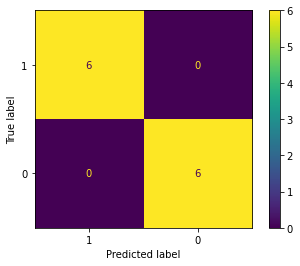

In [40]:
knn_cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=[1,0])
cmd.plot()

In [47]:
knn_cr=classification_report(y_test,y_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [37]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [38]:
nb_model.predict(x_test)

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [41]:
nb_score=accuracy_score(y_test,y_pred)
nb_score

1.0

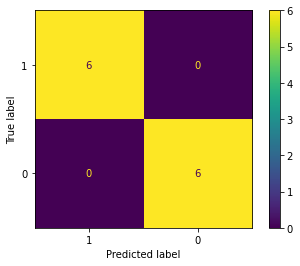

In [44]:
nb_cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=[1,0])
nb_cmd.plot()

In [48]:
nb_cr=classification_report(y_test,y_pred)
print(nb_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

